In [73]:
import pandas as pd
df = pd.read_excel("amazon.xlsx")

In [74]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [75]:
#Covert reviews to lowercase
df["Review"] = df["Review"].str.lower()

In [102]:
#Delete Punctuations
import string
df["Review"] = df["Review"].fillna('')
df["Review"] = df["Review"].apply(lambda x: x.translate(str.maketrans('', '' ,string.punctuation)))

In [77]:
#Delete Numbers
df["Review"] = df["Review"].fillna('').apply(lambda x:''.join([i for i in x if not i.isdigit()])) 

In [78]:
#Delete Stopwords
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [79]:
df["Review"] = df["Review"].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw)) 

In [80]:
df["Review"]

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme studioliv...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [81]:
#Delete Rare Words
temp_df = pd.Series(' '.join(df["Review"]).split()).value_counts() 

In [82]:
temp_df

curtains                           1890
love                               1311
room                               1113
like                               1037
beautiful                           942
                                   ... 
planner                               1
daysbrwouldn’t                        1
qualityðð»ðð»ðð»       1
believing                             1
studioliving                          1
Name: count, Length: 6795, dtype: int64

In [83]:
drops = temp_df[temp_df < 5] #select drops words

In [84]:
df["Review"] = df["Review"].apply(lambda x:" ".join( x for x in str(x).split() if x not in drops)) #combine non dropped words 

In [85]:
df["Review"]

0                                                   happy
1                    good quality material however panels
2       product fun bedroom bit stretched still materi...
3                                        lo que es que un
4       great cant believe quality material vibrant co...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio entire theme area photo first cla...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [86]:
#Tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sezgi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
#We can tokenize by using TextBlob
from textblob import Word, TextBlob
df["Review"].apply(lambda x: TextBlob(x).words)

0                                                 [happy]
1              [good, quality, material, however, panels]
2       [product, fun, bedroom, bit, stretched, still,...
3                                  [lo, que, es, que, un]
4       [great, cant, believe, quality, material, vibr...
                              ...                        
5606    [great, product, reasonable, money, delivered,...
5607                          [color, way, panels, match]
5608    [great, studio, entire, theme, area, photo, fi...
5609                  [brought, beauty, kids, room, love]
5610    [cute, curtains, sons, room, thick, enough, ke...
Name: Review, Length: 5611, dtype: object

In [88]:
#Lemmanization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sezgi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
df["Review"] = df["Review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [90]:
df["Review"]

0                                                   happy
1                     good quality material however panel
2       product fun bedroom bit stretched still materi...
3                                         lo que e que un
4       great cant believe quality material vibrant co...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio entire theme area photo first cla...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [95]:
#Text Visualization
#find term frequency
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words","tf"]

C:\Users\sezgi\AppData\Local\Temp\ipykernel_15872\1891423368.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\sezgi\AppData\Local\Temp\ipykernel_15872\1891423368.py:3: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\sezgi\AppData\Local\Temp\ipykernel_15872\1891423368.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\sezgi\AppData\Local\Temp\ipykernel_15872\1891423368.py:3: FutureWarning: value_counts with

In [96]:
tf

,words,tf
0,happy,196.0
1,good,535.0
2,quality,888.0
3,material,561.0
4,however,78.0
...,...,...
1360,disappoint,6.0
1361,that’s,7.0
1362,coast,8.0
1363,br,18.0


In [97]:
tf.sort_values("tf", ascending= False)

,words,tf
50,curtain,2587.0
28,look,1531.0
97,love,1452.0
82,room,1126.0
137,like,1053.0
...,...,...
118,writing,5.0
955,rid,5.0
952,outstanding,5.0
1237,cartoonish,5.0


<Axes: xlabel='words'>

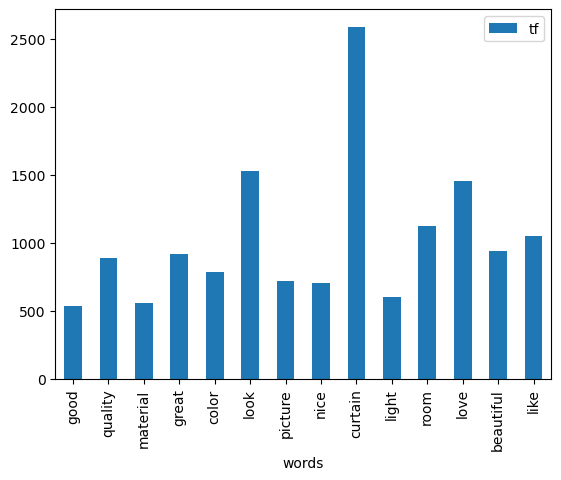

In [98]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")

In [100]:
#Word Cloud
#We need to merge all reviews in one sentence
text = " ".join(i for i in df["Review"])

In [101]:
text

'happy good quality material however panel product fun bedroom bit stretched still material lightweight sheer appreciate lo que e que un great cant believe quality material vibrant color style work beautifully together look different photo exactly looking heavy material great price fast looking picture thought curtain would thinner sheer nice thickness weight help front window look absolutely perfect arrived quickly pleased purchase much thought would wasn’t really expecting wanting use curtain picture show rd set ambesonne curtain one set use summer one autumn set christmas winter durable color vibrant recommend curtain block living room front door area dont mess easily seen put christmas light around really brightens everything private closed darkening point don’t block light work fine night curtain sheer daytime darkening curtain fault ordering  love curtain printed polyester type material back material white put large sliding glass door see curtain would hang material good weight h

In [103]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

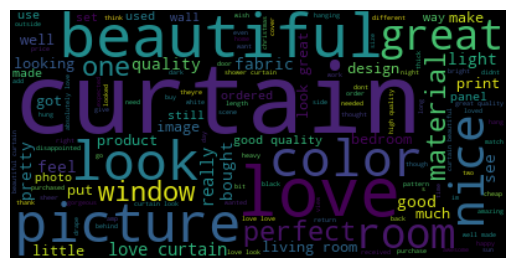

In [104]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#If term frequency is large, word also be large in wordcloud

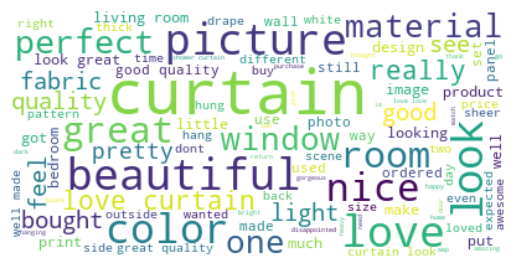

In [107]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()